# REGRESI
## Indah wulandari 202231051

In [1]:
# Import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Baca file CSV
df = pd.read_csv('R03_excercises.csv')
df

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3
...,...,...
69,3.6,1.8
70,1.8,0.7
71,1.9,0.8
72,3.4,1.7


In [3]:
# Proses 
# 1. Cek missing values
print(df.isnull().sum())

Daily Exercise Time (X)    0
Weight Loss (Y)            0
dtype: int64


In [4]:
# 2. Pembersihan data (jika diperlukan)
df = df.dropna()

In [6]:
# 3. Pemilihan fitur
X = df.drop('Daily Exercise Time (X)', axis=1) 
y = df['Daily Exercise Time (X)']

In [7]:
# 4. Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Regresi Linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.009205980636331757
R-squared Score: 0.9915303171280069


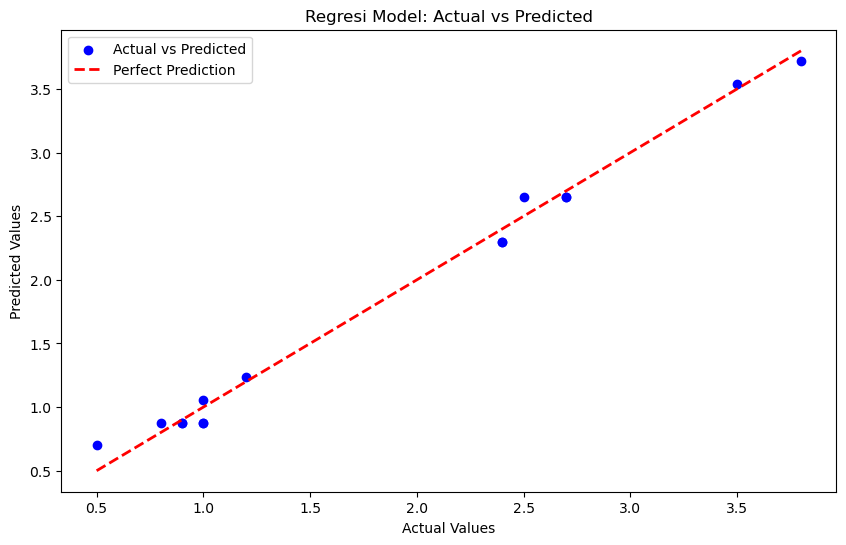

In [10]:
# Visualisasi Model Regresi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regresi Model: Actual vs Predicted')
plt.legend()
plt.show()


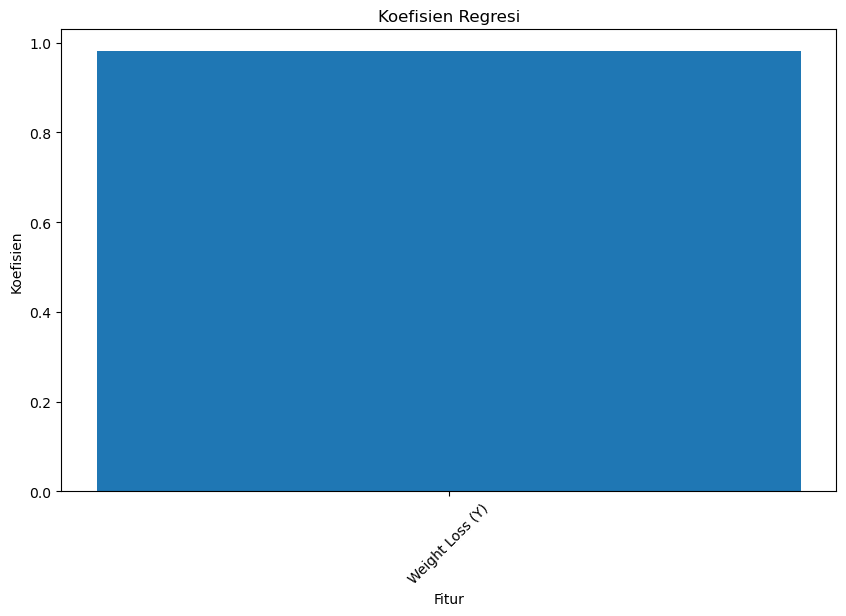

In [11]:
# Visualisasi Koefisien Regresi
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_)
plt.title('Koefisien Regresi')
plt.xlabel('Fitur')
plt.ylabel('Koefisien')
plt.xticks(rotation=45)
plt.show()